In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
export_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Indian export import project/data/raw data/2010_2021_HS2_export.csv')
import_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Indian export import project/data/raw data/2010_2021_HS2_import.csv')


In [ ]:
display(import_df.info())
print ()
display(export_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101051 entries, 0 to 101050
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   HSCode      101051 non-null  int64  
 1   Commodity   101051 non-null  object 
 2   value       101051 non-null  float64
 3   country     101051 non-null  object 
 4   year        101051 non-null  int64  
 5   region      100881 non-null  object 
 6   trade_type  101051 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.4+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184755 entries, 0 to 184754
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   HSCode      184755 non-null  int64  
 1   Commodity   184755 non-null  object 
 2   value       184755 non-null  float64
 3   country     184755 non-null  object 
 4   year        184755 non-null  int64  
 5   region      184262 non-null  object 
 6   trade_type  184755 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 9.9+ MB


None

In [ ]:
display(import_df.shape)
display(export_df.shape)

(101051, 5)

(184755, 5)

In [ ]:
display(import_df.describe())
display(export_df.describe())

,HSCode,value,year
count,101051.000000,85306.000000,101051.000000
mean,53.655501,64.183018,2015.541143
std,27.627867,680.976703,3.464244
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.380000,2016.000000
75%,78.000000,5.040000,2019.000000
max,99.000000,32781.570000,2021.000000


,HSCode,value,year
count,184755.000000,165497.000000,184755.000000
mean,51.232291,22.233844,2015.590344
std,27.965879,223.795216,3.444532
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2013.000000
50%,52.000000,0.370000,2016.000000
75%,74.000000,3.870000,2019.000000
max,99.000000,19805.170000,2021.000000


In [ ]:
display(import_df.isnull().sum())
print(  )
display(export_df.isnull().sum())

,0
HSCode,0
Commodity,0
value,15745
country,0
year,0


,0
HSCode,0
Commodity,0
value,19258
country,0
year,0


In [ ]:
print("Duplicated exports", import_df.duplicated().sum())
print("Duplicated imports", export_df.duplicated().sum())

Duplicated exports 0
Duplicated imports 0


In [ ]:
'''
Function that checks if the same year value has outliers or not
'''
def has_outlier_for_year(df, year, value_col='value', threshold=0.15):

    data = df[(df['year'] == year) & (df[value_col].notnull())]

    if len(data) == 0:
        return False

    Q1 = data[value_col].quantile(0.25)
    Q3 = data[value_col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[value_col] < lower_bound) | (data[value_col] > upper_bound)]
    outlier_percentage = len(outliers) / len(data)

    return outlier_percentage > threshold

In [ ]:
'''
Function that checks if the similar commodities row to missing value
row in the same year has outliers or not.
'''
def has_outlier_in_year(df, year, commodity, value_col='value', threshold=0.15):

    data = df[(df['year'] == year) & (df['Commodity'] == commodity)]
    if len(data) == 0:
        return False

    Q1 = data[value_col].quantile(0.25)
    Q3 = data[value_col].quantile(0.75)
    IQR = Q3 - Q1

    # Defining boundries for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting Outliers
    outliers = data[(data[value_col] < lower_bound) | (data[value_col] > upper_bound)]
    outlier_percent = len(outliers) / len(data)

    return outlier_percent > threshold

In [ ]:
'''
Function to fill data based on the above conditions
'''

def fill_missing_values_same_year(df):

    for index, row in df[df['value'].isnull()].iterrows():
        commodity = row['Commodity']
        year = row['year']

        similar_commodity_data = df[(df['Commodity'] == commodity) & (df['year'] == year) & (df['value'].notnull())]

        if len(similar_commodity_data) > 0:
            if has_outlier_in_year(df, year, commodity):
                df.at[index, 'value'] = similar_commodity_data['value'].median()
            else:
                df.at[index, 'value'] = similar_commodity_data['value'].mean()
        else:
            if has_outlier_for_year(df, year):
                df.at[index, 'value'] = df[df['year'] == year]['value'].median()
            else:
                df.at[index, 'value'] = df[df['year'] == year]['value'].mean()
    return df

In [ ]:
import_pdf = fill_missing_values_same_year(import_df)
export_df = fill_missing_values_same_year(export_df)

In [ ]:
print("Missing Import Values: ")
display(import_df.isnull().sum())

print("Missing Export Values: ")
display(export_df.isnull().sum())

Missing Import Values: 


,0
HSCode,0
Commodity,0
value,0
country,0
year,0


Missing Export Values: 


,0
HSCode,0
Commodity,0
value,0
country,0
year,0


In [ ]:
# import_df.fillna({'region':'unknown'},inplace=True)
# export_df.fillna({'region':'unknown'},inplace=True)

In [ ]:
import_df['country'].unique()

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'AMERI SAMOA', 'ANDORRA',
       'ANGOLA', 'ANGUILLA', 'ANTARTICA', 'ANTIGUA', 'ARGENTINA',
       'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN',
       'BAHAMAS', 'BAHARAIN IS', 'BANGLADESH PR', 'BARBADOS', 'BELARUS',
       'BELGIUM', 'BELIZE', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA',
       'BOSNIA-HRZGOVIN', 'BOTSWANA', 'BR VIRGN IS', 'BRAZIL', 'BRUNEI',
       'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'C AFRI REP', 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CAPE VERDE IS', 'CAYMAN IS', 'CHAD',
       'CHANNEL IS', 'CHILE', 'CHINA P RP', 'CHRISTMAS IS.', 'COCOS IS',
       'COLOMBIA', 'COMOROS', 'CONGO D. REP.', 'CONGO P REP', 'COOK IS',
       'COSTA RICA', "COTE D' IVOIRE", 'CROATIA', 'CUBA', 'CYPRUS',
       'CZECH REPUBLIC', 'DENMARK', 'DJIBOUTI', 'DOMINIC REP', 'DOMINICA',
       'ECUADOR', 'EGYPT A RP', 'EL SALVADOR', 'EQUTL GUINEA', 'ERITREA',
       'ESTONIA', 'ETHIOPIA', 'FALKLAND IS', 'FAROE IS.', 'FIJI IS',
       'FINLA

In [ ]:
countries_continent = {
    'AFGHANISTAN': 'Asia',
    'ALBANIA': 'Europe',
    'ALGERIA': 'Africa',
    'AMERI SAMOA': 'Oceania',
    'ANDORRA': 'Europe',
    'ANGOLA': 'Africa',
    'ANGUILLA': 'North America',
    'ANTARTICA': 'Antarctica',
    'ANTIGUA': 'North America',
    'ARGENTINA': 'South America',
    'ARMENIA': 'Asia',
    'ARUBA': 'North America',
    'AUSTRALIA': 'Oceania',
    'AUSTRIA': 'Europe',
    'AZERBAIJAN': 'Asia',
    'BAHAMAS': 'North America',
    'BAHARAIN IS': 'Asia',
    'BANGLADESH PR': 'Asia',
    'BARBADOS': 'North America',
    'BELARUS': 'Europe',
    'BELGIUM': 'Europe',
    'BELIZE': 'North America',
    'BENIN': 'Africa',
    'BERMUDA': 'North America',
    'BHUTAN': 'Asia',
    'BOLIVIA': 'South America',
    'BOSNIA-HRZGOVIN': 'Europe',
    'BOTSWANA': 'Africa',
    'BR VIRGN IS': 'North America',
    'BRAZIL': 'South America',
    'BRUNEI': 'Asia',
    'BULGARIA': 'Europe',
    'BURKINA FASO': 'Africa',
    'BURUNDI': 'Africa',
    'C AFRI REP': 'Africa',
    'CAMBODIA': 'Asia',
    'CAMEROON': 'Africa',
    'CANADA': 'North America',
    'CAPE VERDE IS': 'Africa',
    'CAYMAN IS': 'North America',
    'CHAD': 'Africa',
    'CHANNEL IS': 'Europe',
    'CHILE': 'South America',
    'CHINA P RP': 'Asia',
    'CHRISTMAS IS.': 'Oceania',
    'COCOS IS': 'Oceania',
    'COLOMBIA': 'South America',
    'COMOROS': 'Africa',
    'CONGO D. REP.': 'Africa',
    'CONGO P REP': 'Africa',
    'COOK IS': 'Oceania',
    'COSTA RICA': 'North America',
    "COTE D' IVOIRE": 'Africa',
    'CROATIA': 'Europe',
    'CUBA': 'North America',
    'CYPRUS': 'Asia',
    'CZECH REPUBLIC': 'Europe',
    'DENMARK': 'Europe',
    'DJIBOUTI': 'Africa',
    'DOMINIC REP': 'North America',
    'DOMINICA': 'North America',
    'ECUADOR': 'South America',
    'EGYPT A RP': 'Africa',
    'EL SALVADOR': 'North America',
    'EQUTL GUINEA': 'Africa',
    'ERITREA': 'Africa',
    'ESTONIA': 'Europe',
    'ETHIOPIA': 'Africa',
    'FALKLAND IS': 'South America',
    'FAROE IS.': 'Europe',
    'FIJI IS': 'Oceania',
    'FINLAND': 'Europe',
    'FR GUIANA': 'South America',
    'FR POLYNESIA': 'Oceania',
    'FR S ANT TR': 'Antarctica',
    'FRANCE': 'Europe',
    'GABON': 'Africa',
    'GAMBIA': 'Africa',
    'GEORGIA': 'Asia',
    'GERMANY': 'Europe',
    'GHANA': 'Africa',
    'GIBRALTAR': 'Europe',
    'GREECE': 'Europe',
    'GREENLAND': 'North America',
    'GRENADA': 'North America',
    'GUADELOUPE': 'North America',
    'GUAM': 'Oceania',
    'GUATEMALA': 'North America',
    'GUINEA': 'Africa',
    'GUINEA BISSAU': 'Africa',
    'GUYANA': 'South America',
    'HAITI': 'North America',
    'HEARD MACDONALD': 'Antarctica',
    'HONDURAS': 'North America',
    'HONG KONG': 'Asia',
    'HUNGARY': 'Europe',
    'ICELAND': 'Europe',
    'INDONESIA': 'Asia',
    'IRAN': 'Asia',
    'IRAQ': 'Asia',
    'IRELAND': 'Europe',
    'ISRAEL': 'Asia',
    'ITALY': 'Europe',
    'JAMAICA': 'North America',
    'JAPAN': 'Asia',
    'JORDAN': 'Asia',
    'KAZAKHSTAN': 'Asia',
    'KENYA': 'Africa',
    'KIRIBATI REP': 'Oceania',
    'KOREA DP RP': 'Asia',
    'KOREA RP': 'Asia',
    'KUWAIT': 'Asia',
    'KYRGHYZSTAN': 'Asia',
    'LAO PD RP': 'Asia',
    'LATVIA': 'Europe',
    'LEBANON': 'Asia',
    'LESOTHO': 'Africa',
    'LIBERIA': 'Africa',
    'LIBYA': 'Africa',
    'LIECHTENSTEIN': 'Europe',
    'LITHUANIA': 'Europe',
    'LUXEMBOURG': 'Europe',
    'MACAO': 'Asia',
    'MACEDONIA': 'Europe',
    'MADAGASCAR': 'Africa',
    'MALAWI': 'Africa',
    'MALAYSIA': 'Asia',
    'MALDIVES': 'Asia',
    'MALI': 'Africa',
    'MALTA': 'Europe',
    'MARSHALL ISLAND': 'Oceania',
    'MARTINIQUE': 'North America',
    'MAURITANIA': 'Africa',
    'MAURITIUS': 'Africa',
    'MEXICO': 'North America',
    'MOLDOVA': 'Europe',
    'MONACO': 'Europe',
    'MONGOLIA': 'Asia',
    'MONTSERRAT': 'North America',
    'MOROCCO': 'Africa',
    'MOZAMBIQUE': 'Africa',
    'MYANMAR': 'Asia',
    'N. MARIANA IS.': 'Oceania',
    'NAMIBIA': 'Africa',
    'NAURU RP': 'Oceania',
    'NEPAL': 'Asia',
    'NETHERLAND': 'Europe',
    'NETHERLANDANTIL': 'North America',
    'NEW CALEDONIA': 'Oceania',
    'NEW ZEALAND': 'Oceania',
    'NICARAGUA': 'North America',
    'NIGER': 'Africa',
    'NIGERIA': 'Africa',
    'NIUE IS': 'Oceania',
    'NORFOLK IS': 'Oceania',
    'NORWAY': 'Europe',
    'OMAN': 'Asia',
    'PAKISTAN IR': 'Asia',
    'PALAU': 'Oceania',
    'PANAMA C Z': 'North America',
    'PANAMA REPUBLIC': 'North America',
    'PAPUA N GNA': 'Oceania',
    'PARAGUAY': 'South America',
    'PERU': 'South America',
    'PHILIPPINES': 'Asia',
    'POLAND': 'Europe',
    'PORTUGAL': 'Europe',
    'PUERTO RICO': 'North America',
    'QATAR': 'Asia',
    'REUNION': 'Africa',
    'ROMANIA': 'Europe',
    'RUSSIA': 'Europe',
    'RWANDA': 'Africa',
    'SAMOA': 'Oceania',
    'SAO TOME': 'Africa',
    'SAUDI ARAB': 'Asia',
    'SENEGAL': 'Africa',
    'SEYCHELLES': 'Africa',
    'SIERRA LEONE': 'Africa',
    'SINGAPORE': 'Asia',
    'SLOVAK REP': 'Europe',
    'SLOVENIA': 'Europe',
    'SOLOMON IS': 'Oceania',
    'SOMALIA': 'Africa',
    'SOUTH AFRICA': 'Africa',
    'SPAIN': 'Europe',
    'SRI LANKA DSR': 'Asia',
    'ST HELENA': 'Africa',
    'ST KITT N A': 'North America',
    'ST LUCIA': 'North America',
    'ST PIERRE': 'North America',
    'ST VINCENT': 'North America',
    'SUDAN': 'Africa',
    'SURINAME': 'South America',
    'SWAZILAND': 'Africa',
    'SWEDEN': 'Europe',
    'SWITZERLAND': 'Europe',
    'SYRIA': 'Asia',
    'TAIWAN': 'Asia',
    'TAJIKISTAN': 'Asia',
    'TANZANIA REP': 'Africa',
    'THAILAND': 'Asia',
    'TIMOR LESTE': 'Asia',
    'TOGO': 'Africa',
    'TOKELAU IS': 'Oceania',
    'TONGA': 'Oceania',
    'TRINIDAD': 'North America',
    'TUNISIA': 'Africa',
    'TURKEY': 'Asia',
    'TURKMENISTAN': 'Asia',
    'TURKS C IS': 'North America',
    'TUVALU': 'Oceania',
    'U ARAB EMTS': 'Asia',
    'U K': 'Europe',
    'U S A': 'North America',
    'UGANDA': 'Africa',
    'UKRAINE': 'Europe',
    'UNION OF SERBIA & MONTENEGRO': 'Europe',
    'UNSPECIFIED': 'Unspecified',
    'URUGUAY': 'South America',
    'UZBEKISTAN': 'Asia',
    'VANUATU REP': 'Oceania',
    'VENEZUELA': 'South America',
    'VIETNAM SOC REP': 'Asia',
    'VIRGIN IS US': 'North America',
    'WALLIS F IS': 'Oceania',
    'YEMEN REPUBLC': 'Asia',
    'ZAMBIA': 'Africa',
    'ZIMBABWE': 'Africa',
    'PACIFIC IS': 'Oceania',
    'MICRONESIA': 'Oceania',
    'MONTENEGRO': 'Europe',
    'SAN MARINO': 'Europe',
    'SERBIA': 'Europe',
    'US MINOR OUTLYING ISLANDS': 'Oceania',
    'VATICAN CITY': 'Europe',
    'PITCAIRN IS.': 'Oceania',
    'SOUTH SUDAN ': 'Africa',
    'GUERNSEY': 'Europe',
    'MAYOTTE': 'Africa',
    'JERSEY': 'Europe',
    'STATE OF PALEST': 'Asia',
    'INSTALLATIONS IN INTERNATIONAL WATERS': 'International',
    'US MINOR OUTLYING ISLANDS': 'North America'
}

import_df['region']=import_df['country'].map(countries_continent)

In [ ]:
import_df

,HSCode,Commodity,value,country,year,region
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.140000,AFGHANISTAN,2010,Asia
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.820000,AFGHANISTAN,2010,Asia
2,9,"COFFEE, TEA, MATE AND SPICES.",2.540000,AFGHANISTAN,2010,Asia
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.320000,AFGHANISTAN,2010,Asia
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.670000,AFGHANISTAN,2010,Asia
...,...,...,...,...,...,...
101046,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",0.020000,ZIMBABWE,2021,Africa
101047,85,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,0.000000,ZIMBABWE,2021,Africa
101048,90,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",0.030000,ZIMBABWE,2021,Africa
101049,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,0.000000,ZIMBABWE,2021,Africa


In [ ]:
export_df['country'].unique()

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'AMERI SAMOA', 'ANDORRA',
       'ANGOLA', 'ANGUILLA', 'ANTARTICA', 'ANTIGUA', 'ARGENTINA',
       'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN',
       'BAHAMAS', 'BAHARAIN IS', 'BANGLADESH PR', 'BARBADOS', 'BELARUS',
       'BELGIUM', 'BELIZE', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA',
       'BOSNIA-HRZGOVIN', 'BOTSWANA', 'BR VIRGN IS', 'BRAZIL', 'BRUNEI',
       'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'C AFRI REP', 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CANARY IS', 'CAPE VERDE IS', 'CAYMAN IS',
       'CHAD', 'CHILE', 'CHINA P RP', 'CHRISTMAS IS.', 'COCOS IS',
       'COLOMBIA', 'COMOROS', 'CONGO D. REP.', 'CONGO P REP', 'COOK IS',
       'COSTA RICA', "COTE D' IVOIRE", 'CROATIA', 'CUBA', 'CYPRUS',
       'CZECH REPUBLIC', 'DENMARK', 'DJIBOUTI', 'DOMINIC REP', 'DOMINICA',
       'ECUADOR', 'EGYPT A RP', 'EL SALVADOR', 'EQUTL GUINEA', 'ERITREA',
       'ESTONIA', 'ETHIOPIA', 'FALKLAND IS', 'FAROE IS.', 'FIJI IS',
       'FINLAN

In [ ]:
countries_to_continent = {
    'AFGHANISTAN': 'Asia',
    'ALBANIA': 'Europe',
    'ALGERIA': 'Africa',
    'AMERI SAMOA': 'Oceania',
    'ANDORRA': 'Europe',
    'ANGOLA': 'Africa',
    'ANGUILLA': 'North America',
    'ANTARTICA': 'Antarctica',
    'ANTIGUA': 'North America',
    'ARGENTINA': 'South America',
    'ARMENIA': 'Asia',
    'ARUBA': 'North America',
    'AUSTRALIA': 'Oceania',
    'AUSTRIA': 'Europe',
    'AZERBAIJAN': 'Asia',
    'BAHAMAS': 'North America',
    'BAHARAIN IS': 'Asia',
    'BANGLADESH PR': 'Asia',
    'BARBADOS': 'North America',
    'BELARUS': 'Europe',
    'BELGIUM': 'Europe',
    'BELIZE': 'North America',
    'BENIN': 'Africa',
    'BERMUDA': 'North America',
    'BHUTAN': 'Asia',
    'BOLIVIA': 'South America',
    'BOSNIA-HRZGOVIN': 'Europe',
    'BOTSWANA': 'Africa',
    'BR VIRGN IS': 'North America',
    'BRAZIL': 'South America',
    'BRUNEI': 'Asia',
    'BULGARIA': 'Europe',
    'BURKINA FASO': 'Africa',
    'BURUNDI': 'Africa',
    'C AFRI REP': 'Africa',
    'CAMBODIA': 'Asia',
    'CAMEROON': 'Africa',
    'CANADA': 'North America',
    'CANARY IS': 'Africa',
    'CAPE VERDE IS': 'Africa',
    'CAYMAN IS': 'North America',
    'CHAD': 'Africa',
    'CHILE': 'South America',
    'CHINA P RP': 'Asia',
    'CHRISTMAS IS.': 'Oceania',
    'COCOS IS': 'Oceania',
    'COLOMBIA': 'South America',
    'COMOROS': 'Africa',
    'CONGO D. REP.': 'Africa',
    'CONGO P REP': 'Africa',
    'COOK IS': 'Oceania',
    'COSTA RICA': 'North America',
    "COTE D' IVOIRE": 'Africa',
    'CROATIA': 'Europe',
    'CUBA': 'North America',
    'CYPRUS': 'Asia',
    'CZECH REPUBLIC': 'Europe',
    'DENMARK': 'Europe',
    'DJIBOUTI': 'Africa',
    'DOMINIC REP': 'North America',
    'DOMINICA': 'North America',
    'ECUADOR': 'South America',
    'EGYPT A RP': 'Africa',
    'EL SALVADOR': 'North America',
    'EQUTL GUINEA': 'Africa',
    'ERITREA': 'Africa',
    'ESTONIA': 'Europe',
    'ETHIOPIA': 'Africa',
    'FALKLAND IS': 'South America',
    'FAROE IS.': 'Europe',
    'FIJI IS': 'Oceania',
    'FINLAND': 'Europe',
    'FR GUIANA': 'South America',
    'FR POLYNESIA': 'Oceania',
    'FR S ANT TR': 'Antarctica',
    'FRANCE': 'Europe',
    'GABON': 'Africa',
    'GAMBIA': 'Africa',
    'GEORGIA': 'Asia',
    'GERMANY': 'Europe',
    'GHANA': 'Africa',
    'GIBRALTAR': 'Europe',
    'GREECE': 'Europe',
    'GREENLAND': 'North America',
    'GRENADA': 'North America',
    'GUADELOUPE': 'North America',
    'GUAM': 'Oceania',
    'GUATEMALA': 'North America',
    'GUINEA': 'Africa',
    'GUINEA BISSAU': 'Africa',
    'GUYANA': 'South America',
    'HAITI': 'North America',
    'HEARD MACDONALD': 'Antarctica',
    'HONDURAS': 'North America',
    'HONG KONG': 'Asia',
    'HUNGARY': 'Europe',
    'ICELAND': 'Europe',
    'INDONESIA': 'Asia',
    'IRAN': 'Asia',
    'IRAQ': 'Asia',
    'IRELAND': 'Europe',
    'ISRAEL': 'Asia',
    'ITALY': 'Europe',
    'JAMAICA': 'North America',
    'JAPAN': 'Asia',
    'JORDAN': 'Asia',
    'KAZAKHSTAN': 'Asia',
    'KENYA': 'Africa',
    'KIRIBATI REP': 'Oceania',
    'KOREA DP RP': 'Asia',
    'KOREA RP': 'Asia',
    'KUWAIT': 'Asia',
    'KYRGHYZSTAN': 'Asia',
    'LAO PD RP': 'Asia',
    'LATVIA': 'Europe',
    'LEBANON': 'Asia',
    'LESOTHO': 'Africa',
    'LIBERIA': 'Africa',
    'LIBYA': 'Africa',
    'LIECHTENSTEIN': 'Europe',
    'LITHUANIA': 'Europe',
    'LUXEMBOURG': 'Europe',
    'MACAO': 'Asia',
    'MACEDONIA': 'Europe',
    'MADAGASCAR': 'Africa',
    'MALAWI': 'Africa',
    'MALAYSIA': 'Asia',
    'MALDIVES': 'Asia',
    'MALI': 'Africa',
    'MALTA': 'Europe',
    'MARSHALL ISLAND': 'Oceania',
    'MARTINIQUE': 'North America',
    'MAURITANIA': 'Africa',
    'MAURITIUS': 'Africa',
    'MEXICO': 'North America',
    'MICRONESIA': 'Oceania',
    'MOLDOVA': 'Europe',
    'MONACO': 'Europe',
    'MONGOLIA': 'Asia',
    'MONTSERRAT': 'North America',
    'MOROCCO': 'Africa',
    'MOZAMBIQUE': 'Africa',
    'MYANMAR': 'Asia',
    'N. MARIANA IS.': 'Oceania',
    'NAMIBIA': 'Africa',
    'NAURU RP': 'Oceania',
    'NEPAL': 'Asia',
    'NETHERLAND': 'Europe',
    'NETHERLANDANTIL': 'North America',
    'NEW CALEDONIA': 'Oceania',
    'NEW ZEALAND': 'Oceania',
    'NICARAGUA': 'North America',
    'NIGER': 'Africa',
    'NIGERIA': 'Africa',
    'NIUE IS': 'Oceania',
    'NORFOLK IS': 'Oceania',
    'NORWAY': 'Europe',
    'OMAN': 'Asia',
    'PACIFIC IS': 'Oceania',
    'PAKISTAN IR': 'Asia',
    'PALAU': 'Oceania',
    'PANAMA C Z': 'North America',
    'PANAMA REPUBLIC': 'North America',
    'PAPUA N GNA': 'Oceania',
    'PARAGUAY': 'South America',
    'PERU': 'South America',
    'PHILIPPINES': 'Asia',
    'PITCAIRN IS.': 'Oceania',
    'POLAND': 'Europe',
    'PORTUGAL': 'Europe',
    'PUERTO RICO': 'North America',
    'QATAR': 'Asia',
    'REUNION': 'Africa',
    'ROMANIA': 'Europe',
    'RUSSIA': 'Europe',
    'RWANDA': 'Africa',
    'SAHARWI A.DM RP': 'Africa',
    'SAMOA': 'Oceania',
    'SAO TOME': 'Africa',
    'SAUDI ARAB': 'Asia',
    'SENEGAL': 'Africa',
    'SEYCHELLES': 'Africa',
    'SIERRA LEONE': 'Africa',
    'SINGAPORE': 'Asia',
    'SLOVAK REP': 'Europe',
    'SLOVENIA': 'Europe',
    'SOLOMON IS': 'Oceania',
    'SOMALIA': 'Africa',
    'SOUTH AFRICA': 'Africa',
    'SPAIN': 'Europe',
    'SRI LANKA DSR': 'Asia',
    'ST HELENA': 'Africa',
    'ST KITT N A': 'North America',
    'ST LUCIA': 'North America',
    'ST PIERRE': 'North America',
    'ST VINCENT': 'North America',
    'SUDAN': 'Africa',
    'SURINAME': 'South America',
    'SWAZILAND': 'Africa',
    'SWEDEN': 'Europe',
    'SWITZERLAND': 'Europe',
    'SYRIA': 'Asia',
    'TAIWAN': 'Asia',
    'TAJIKISTAN': 'Asia',
    'TANZANIA REP': 'Africa',
    'THAILAND': 'Asia',
    'TIMOR LESTE': 'Asia',
    'TOGO': 'Africa',
    'TOKELAU IS': 'Oceania',
    'TONGA': 'Oceania',
    'TRINIDAD': 'North America',
    'TUNISIA': 'Africa',
    'TURKEY': 'Asia',
    'TURKMENISTAN': 'Asia',
    'TURKS C IS': 'North America',
    'TUVALU': 'Oceania',
    'U ARAB EMTS': 'Asia',
    'U K': 'Europe',
    'U S A': 'North America',
    'UGANDA': 'Africa',
    'UKRAINE': 'Europe',
    'UNION OF SERBIA & MONTENEGRO': 'Europe',
    'UNSPECIFIED': 'Undefined',
    'URUGUAY': 'South America',
    'UZBEKISTAN': 'Asia',
    'VANUATU REP': 'Oceania',
    'VENEZUELA': 'South America',
    'VIETNAM SOC REP': 'Asia',
    'VIRGIN IS US': 'North America',
    'WALLIS F IS': 'Oceania',
    'YEMEN REPUBLC': 'Asia',
    'ZAMBIA': 'Africa',
    'ZIMBABWE': 'Africa',
    'CHANNEL IS': 'Europe',
    'NEUTRAL ZONE': 'Undefined',
    'MONTENEGRO': 'Europe',
    'SAN MARINO': 'Europe',
    'SERBIA': 'Europe',
    'US MINOR OUTLYING ISLANDS': 'Oceania',
    'VATICAN CITY': 'Europe',
    'CURACAO': 'North America',
    'INSTALLATIONS IN INTERNATIONAL WATERS': 'Undefined',
    'MAYOTTE': 'Africa',
    'SINT MAARTEN (DUTCH PART)': 'North America',
    'SOUTH SUDAN': 'Africa',
    'GUERNSEY': 'Europe',
    'JERSEY': 'Europe',
    'STATE OF PALEST': 'Asia',
    'SVALLBARD AND J': 'Europe',
    'US MINOR OUTLYING ISLANDS': 'North America'
}
export_df['region']=export_df['country'].map(countries_to_continent)

In [ ]:
#export_df

In [ ]:
#Create a new column 'trade_type'
import_df['trade_type']='Import'
export_df['trade_type']='Export'

In [ ]:
data=pd.concat([import_df,export_df])
data

,HSCode,Commodity,value,country,year,region,trade_type
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010,Asia,Import
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010,Asia,Import
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010,Asia,Import
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010,Asia,Import
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010,Asia,Import
...,...,...,...,...,...,...,...
184750,94,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",0.19,ZIMBABWE,2021,Africa,Export
184751,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2021,Africa,Export
184752,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.31,ZIMBABWE,2021,Africa,Export
184753,98,PROJECT GOODS; SOME SPECIAL USES.,0.01,ZIMBABWE,2021,Africa,Export


In [ ]:
data.head(5)

,HSCode,Commodity,value,country,year,region,trade_type
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010,Asia,Import
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010,Asia,Import
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010,Asia,Import
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010,Asia,Import
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010,Asia,Import


In [ ]:
data.isnull().sum()

,0
HSCode,0
Commodity,0
value,0
country,0
year,0
region,663
trade_type,0


In [ ]:
data['Commodity'].unique()

array(['EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.',
       'EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.',
       'COFFEE, TEA, MATE AND SPICES.',
       'OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEEDS AND FRUIT; INDUSTRIAL OR MEDICINAL PLANTS; STRAW AND FODDER.',
       'LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND EXTRACTS.',
       'PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEANS, MOLLUSCS OR OTHER AQUATIC INVERTEBRATES',
       'COCOA AND COCOA PREPARATIONS.',
       'PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTHER PARTS OF PLANTS.',
       'SALT; SULPHUR; EARTHS AND STONE; PLASTERING MATERIALS, LIME AND CEMENT.',
       'MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.',
       'INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPOUNDS OF PRECIOUS METALS, OF RARE-EARTH METALS, OR RADI. ELEM. OR OF ISOTOPES.',
       'PHARMACEUTICAL PRODUCTS', 'MISCELLANEOUS CHEMICAL PRODUCTS.',
       'PLASTIC AND ARTICLES THEREOF.

# **Using NLP to make a Commodity category column**

In [ ]:
import spacy

# Load SpaCy's small English model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

data['cleaned_commodity'] = data['Commodity'].apply(preprocess_text)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
data.head(10)

,HSCode,Commodity,value,country,year,region,trade_type,cleaned_commodity,commodity_category,commodity_category_name
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010,Asia,Import,edible vegetable certain root tuber,1,None
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010,Asia,Import,edible fruit nut peel citrus fruit melon,1,None
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010,Asia,Import,coffee tea mate spice,4,None
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010,Asia,Import,oil seed olea fruit misc grain seed fruit indu...,1,None
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010,Asia,Import,lac gum resin vegetable sap extract,1,None
5,16,"PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...",0.00,AFGHANISTAN,2010,Asia,Import,preparation meat fish crustacean mollusc aquat...,4,None
6,18,COCOA AND COCOA PREPARATIONS.,0.00,AFGHANISTAN,2010,Asia,Import,cocoa cocoa preparation,1,None
7,20,"PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTH...",0.01,AFGHANISTAN,2010,Asia,Import,preparation vegetable fruit nut part plant,1,None
8,25,SALT; SULPHUR; EARTHS AND STONE; PLASTERING MA...,1.05,AFGHANISTAN,2010,Asia,Import,salt sulphur earth stone plaster material lime...,4,None
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.00,AFGHANISTAN,2010,Asia,Import,mineral fuel mineral oil product distillation ...,5,None


### STEP2 - **Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

tfidf_matrix = tfidf.fit_transform(data['cleaned_commodity'])

### **STEP3 - Distributing into categories**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)

data['commodity_category'] = kmeans.fit_predict(tfidf_matrix)

In [ ]:
data.head(300)

,HSCode,Commodity,value,country,year,region,trade_type,cleaned_commodity,commodity_category,commodity_category_name
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010,Asia,Import,edible vegetable certain root tuber,1,None
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010,Asia,Import,edible fruit nut peel citrus fruit melon,1,None
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010,Asia,Import,coffee tea mate spice,4,None
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010,Asia,Import,oil seed olea fruit misc grain seed fruit indu...,1,None
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010,Asia,Import,lac gum resin vegetable sap extract,1,None
...,...,...,...,...,...,...,...,...,...,...
295,9,"COFFEE, TEA, MATE AND SPICES.",0.00,AUSTRIA,2010,Europe,Import,coffee tea mate spice,4,None
296,10,CEREALS.,0.09,AUSTRIA,2010,Europe,Import,cereal,4,None
297,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,0.02,AUSTRIA,2010,Europe,Import,product milling industry malt starch inulin wh...,5,None
298,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",0.24,AUSTRIA,2010,Europe,Import,lac gum resin vegetable sap extract,1,None


### **STEP4 - Display categories**

In [ ]:
for i in range(10):
    print(f"Category {i}:")
    print(data[data['commodity_category'] == i]['Commodity'].sample(5))
    print("\n")

Category 0:
119280    TANNING OR DYEING EXTRACTS; TANNINS AND THEIR ...
174754    TANNING OR DYEING EXTRACTS; TANNINS AND THEIR ...
92493     TANNING OR DYEING EXTRACTS; TANNINS AND THEIR ...
47091     TANNING OR DYEING EXTRACTS; TANNINS AND THEIR ...
77434     TANNING OR DYEING EXTRACTS; TANNINS AND THEIR ...
Name: Commodity, dtype: object


Category 1:
100802    PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTH...
28215     ESSENTIAL OILS AND RESINOIDS; PERFUMERY, COSME...
21374     LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...
63856       EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.
161830      EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.
Name: Commodity, dtype: object


Category 2:
93237     OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...
23163     VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...
106132    ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...
184111    OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLO...
47817     ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ..

In [ ]:
#Data Visualization using bar graph

#create a dataframe first
category_counts = data['commodity_category'].value_counts().reset_index()
category_counts.columns=['commodity_category','counts']
category_counts

,commodity_category,counts
0,4,83210
1,6,65319
2,1,38334
3,2,28451
4,5,23376
5,7,19963
6,3,9409
7,8,8481
8,9,5720
9,0,3543


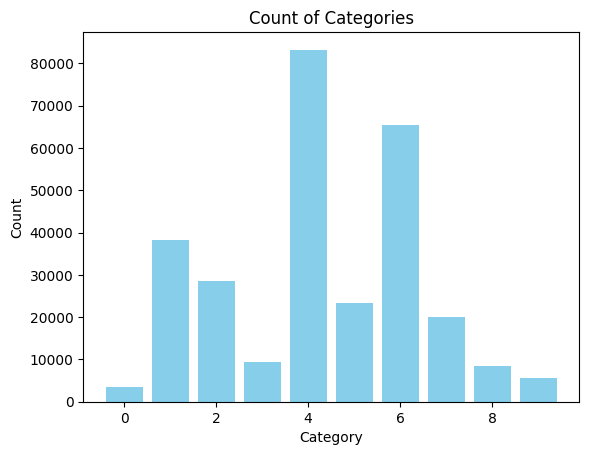

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.bar(category_counts['commodity_category'],category_counts['counts'], color='skyblue')
plt.title("Count of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.figure(figsize=(10,5))

plt.show()

## **Converting numeric commodity category into name commodity category.**

In [ ]:
def category_to_name(row):
    if row == 0:
        return 'Cosmetics'
    elif row == 1:
        return 'Processed Goods'
    elif row == 2:
        return 'General Goods and Raw Materials'
    elif row == 3:
        return 'Photographic and Optical Goods'
    elif row == 4:
        return 'General Miscellaneous Products'
    elif row == 5:
        return 'Iron and Steel Goods'
    elif row == 6:
        return 'Textile Products and Fabrics'
    elif row == 7:
        return 'Minerals, Stones, and Raw Materials'
    elif row == 8:
        return 'Vehicles, Machinery, and Diverse Goods'
    elif row == 9:
        return 'Glass Products'
    else:
        return None  # In case the category doesn't match any value

# Apply the function to the 'commodity_category' column
data['commodity_category_name'] = data['commodity_category'].apply(category_to_name)

In [ ]:
data

,HSCode,Commodity,value,country,year,region,trade_type,cleaned_commodity,commodity_category,commodity_category_name
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010,Asia,Import,edible vegetable certain root tuber,1,Processed Goods
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010,Asia,Import,edible fruit nut peel citrus fruit melon,1,Processed Goods
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010,Asia,Import,coffee tea mate spice,4,General Miscellaneous Products
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010,Asia,Import,oil seed olea fruit misc grain seed fruit indu...,1,Processed Goods
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010,Asia,Import,lac gum resin vegetable sap extract,1,Processed Goods
...,...,...,...,...,...,...,...,...,...,...
184750,94,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",0.19,ZIMBABWE,2021,Africa,Export,furniture bedding mattress mattress support cu...,4,General Miscellaneous Products
184751,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2021,Africa,Export,toy game sport requisite part accessory thereof,2,General Goods and Raw Materials
184752,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.31,ZIMBABWE,2021,Africa,Export,miscellaneous manufactured article,3,Photographic and Optical Goods
184753,98,PROJECT GOODS; SOME SPECIAL USES.,0.01,ZIMBABWE,2021,Africa,Export,project good special use,7,"Minerals, Stones, and Raw Materials"


## **Exporting Data to CSV**

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Indian export import project/data/raw data/Indian Trade Project F.csv', index=False)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Indian export import project/data/raw data/Indian Trade Project F.csv')
data

,HSCode,Commodity,value,country,year,region,trade_type,cleaned_commodity,commodity_category,commodity_category_name
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010,Asia,Import,edible vegetable certain root tuber,1,Processed Goods
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010,Asia,Import,edible fruit nut peel citrus fruit melon,1,Processed Goods
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010,Asia,Import,coffee tea mate spice,4,General Miscellaneous Products
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010,Asia,Import,oil seed olea fruit misc grain seed fruit indu...,1,Processed Goods
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010,Asia,Import,lac gum resin vegetable sap extract,1,Processed Goods
...,...,...,...,...,...,...,...,...,...,...
285801,94,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",0.19,ZIMBABWE,2021,Africa,Export,furniture bedding mattress mattress support cu...,4,General Miscellaneous Products
285802,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2021,Africa,Export,toy game sport requisite part accessory thereof,2,General Goods and Raw Materials
285803,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.31,ZIMBABWE,2021,Africa,Export,miscellaneous manufactured article,3,Photographic and Optical Goods
285804,98,PROJECT GOODS; SOME SPECIAL USES.,0.01,ZIMBABWE,2021,Africa,Export,project good special use,7,"Minerals, Stones, and Raw Materials"


## **Commodity category table**

In [ ]:
#Creating a commodity category index
commodity_categories_df = data[['commodity_category_name']].drop_duplicates().reset_index(drop=True)
commodity_categories_df['category_id'] = commodity_categories_df.index + 1  # Add a unique ID for each category
commodity_categories_df = commodity_categories_df.reindex(columns=['category_id', 'commodity_category_name'])
commodity_categories_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Indian export import project/data/tables/Commodity category F.csv', index=False)

## **Commodities Table**

In [ ]:
#Merging commodity category table with commodities table (having 'commodity_category_name' as a common coloumn)
commodities_df = data[['HSCode', 'Commodity', 'cleaned_commodity', 'commodity_category_name']].drop_duplicates()
commodities_df = commodities_df.merge(commodity_categories_df, on='commodity_category_name')
commodities_df = commodities_df.drop('commodity_category_name', axis=1)
commodities_df = commodities_df.rename(columns={'HSCode': 'commodity_id'})
commodities_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Indian export import project/data/tables/commmodities F.csv', index=False)

## **Countries Table**

In [ ]:
countries_df = data[['country', 'region']].drop_duplicates().reset_index(drop=True)
countries_df['country_id'] = countries_df.index + 1  # Add a unique ID for each country
countries_df = countries_df.reindex(columns=['country_id','country', 'region'])
countries_df=countries_df.merge(region_table[['region','region_id']],on='region')
countries_df=countries_df.drop('region',axis=1)
countries_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Indian export import project/data/tables/countries F.csv', index=False)


## **Trades Table**

In [ ]:
trades_df = data[['HSCode', 'country', 'value', 'year', 'trade_type']]

In [ ]:
trades_df = trades_df.rename(columns={'HSCode': 'commodity_id'})
trades_df = trades_df.merge(commodities_df[['commodity_id', 'category_id']], on='commodity_id')
trades_df = trades_df.merge(countries_df[['country', 'country_id']], on='country')
trades_df = trades_df.reindex(columns=[ 'trade_type', 'value', 'year','country_id', 'commodity_id', 'category_id'])
trades_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Indian export import project/data/tables/trades F.csv', index=False)

## **Region Table**

In [ ]:
region_table=data['region'].drop_duplicates().reset_index()
region_table=region_table.drop('index',axis=1)
region_table['region_id']=region_table.index+1
region_table=region_table.reindex(columns=['region_id','region'])
region_table.to_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Indian export import project/data/tables/region F.csv', index=False)